In [1]:
import numpy as np
import matplotlib.pyplot as plt
from LammpsTools import util
import os

import utilExp

In [2]:
waterInfo = util.parseFluidInfo("./waterInfo.txt")

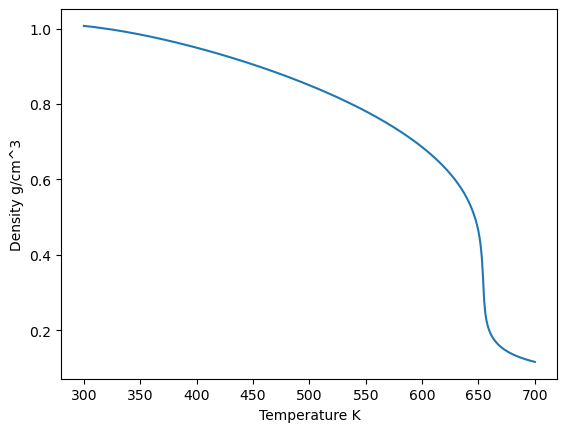

In [3]:
plt.plot(waterInfo['Temperature'], waterInfo['Density'])
plt.xlabel("Temperature K")
plt.ylabel("Density g/cm^3")
plt.show()

# Get the New project

In [4]:
# Get the box size
box_size_A = np.pi * 2 / 0.1

# Get the density for the simualtion
# Create a series of new projects
temp_list = np.array([50, 100, 150, 200, 250, 300, 350]) + 273.15
density_list = []
for temp in temp_list:
    temp_idx = np.argmin(np.abs(waterInfo['Temperature'] - temp))
    density_list.append(waterInfo['Density'][temp_idx] * 1.0 )

density_list = np.array(density_list) - 0.05

print("The density to study is")
print(density_list)

The density to study is
[0.94826 0.91931 0.87992 0.83083 0.77018 0.6917  0.57165]


In [5]:
# Define the range of temperature difference
delta_T_list = np.array([50, 100, 150, 200])

In [19]:
workdir = "/mnt/c/Users/haoyuan/Desktop/PosDoc/LammpsProjInitialization/"
proj_list = []

for temp_idx in range(temp_list.shape[0]):
    temp = temp_list[temp_idx]
    density = density_list[temp_idx]
    for deltaT in delta_T_list:
        # Actually create the new system
        proj_id = "_{:.2f}C_to_{:.2f}C_at_{:.2f}gcm3".format(temp - 273.15, temp - 273.15 + deltaT, density)
        proj_id = proj_id.replace('.', 'p')

        # Attach the project to the list
        proj_list.append(" proj{}".format(proj_id))

        #utilExp.createNewProj(proj_ID=proj_id,
        #                      temperature=temp,
        #                      temperature_change=deltaT,
        #                      density_gcm3=density,
        #                      box_size_A=box_size_A,
        #                      )


In [22]:
proj_list

[' proj_50p00C_to_100p00C_at_0p95gcm3',
 ' proj_50p00C_to_150p00C_at_0p95gcm3',
 ' proj_50p00C_to_200p00C_at_0p95gcm3',
 ' proj_50p00C_to_250p00C_at_0p95gcm3',
 ' proj_100p00C_to_150p00C_at_0p92gcm3',
 ' proj_100p00C_to_200p00C_at_0p92gcm3',
 ' proj_100p00C_to_250p00C_at_0p92gcm3',
 ' proj_100p00C_to_300p00C_at_0p92gcm3',
 ' proj_150p00C_to_200p00C_at_0p88gcm3',
 ' proj_150p00C_to_250p00C_at_0p88gcm3',
 ' proj_150p00C_to_300p00C_at_0p88gcm3',
 ' proj_150p00C_to_350p00C_at_0p88gcm3',
 ' proj_200p00C_to_250p00C_at_0p83gcm3',
 ' proj_200p00C_to_300p00C_at_0p83gcm3',
 ' proj_200p00C_to_350p00C_at_0p83gcm3',
 ' proj_200p00C_to_400p00C_at_0p83gcm3',
 ' proj_250p00C_to_300p00C_at_0p77gcm3',
 ' proj_250p00C_to_350p00C_at_0p77gcm3',
 ' proj_250p00C_to_400p00C_at_0p77gcm3',
 ' proj_250p00C_to_450p00C_at_0p77gcm3',
 ' proj_300p00C_to_350p00C_at_0p69gcm3',
 ' proj_300p00C_to_400p00C_at_0p69gcm3',
 ' proj_300p00C_to_450p00C_at_0p69gcm3',
 ' proj_300p00C_to_500p00C_at_0p69gcm3',
 ' proj_350p00C_to_4

In [20]:
"".join(proj_list)

' proj_50p00C_to_100p00C_at_0p95gcm3 proj_50p00C_to_150p00C_at_0p95gcm3 proj_50p00C_to_200p00C_at_0p95gcm3 proj_50p00C_to_250p00C_at_0p95gcm3 proj_100p00C_to_150p00C_at_0p92gcm3 proj_100p00C_to_200p00C_at_0p92gcm3 proj_100p00C_to_250p00C_at_0p92gcm3 proj_100p00C_to_300p00C_at_0p92gcm3 proj_150p00C_to_200p00C_at_0p88gcm3 proj_150p00C_to_250p00C_at_0p88gcm3 proj_150p00C_to_300p00C_at_0p88gcm3 proj_150p00C_to_350p00C_at_0p88gcm3 proj_200p00C_to_250p00C_at_0p83gcm3 proj_200p00C_to_300p00C_at_0p83gcm3 proj_200p00C_to_350p00C_at_0p83gcm3 proj_200p00C_to_400p00C_at_0p83gcm3 proj_250p00C_to_300p00C_at_0p77gcm3 proj_250p00C_to_350p00C_at_0p77gcm3 proj_250p00C_to_400p00C_at_0p77gcm3 proj_250p00C_to_450p00C_at_0p77gcm3 proj_300p00C_to_350p00C_at_0p69gcm3 proj_300p00C_to_400p00C_at_0p69gcm3 proj_300p00C_to_450p00C_at_0p69gcm3 proj_300p00C_to_500p00C_at_0p69gcm3 proj_350p00C_to_400p00C_at_0p57gcm3 proj_350p00C_to_450p00C_at_0p57gcm3 proj_350p00C_to_500p00C_at_0p57gcm3 proj_350p00C_to_550p00C_at_0p5

In [21]:
curdir = os.getcwd()
os.chdir(workdir)
os.system("tar -zvcf {}/projects.gz {}".format(workdir, "".join(proj_list)))
os.chdir(curdir)

proj_50p00C_to_100p00C_at_0p95gcm3/
proj_50p00C_to_100p00C_at_0p95gcm3/check temperature.ipynb
proj_50p00C_to_100p00C_at_0p95gcm3/checkRDF.ipynb
proj_50p00C_to_100p00C_at_0p95gcm3/getISF.ipynb
proj_50p00C_to_100p00C_at_0p95gcm3/logFiles/
proj_50p00C_to_100p00C_at_0p95gcm3/miniRun.lmp
proj_50p00C_to_100p00C_at_0p95gcm3/output/
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Angles
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Angles.template
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Atoms
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Atoms.template
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Bonds
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Bonds.template
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Boundary
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Boundary.template
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree/Data Masses
proj_50p00C_to_100p00C_at_0p95gcm3/output_ttree